# Projekat iz predmeta analiza socijalnih mreza


## Kvantitativna i kvalitativna Analiza stanja profesionalnog muškog tenisa u periodu od 2018. do 2020. godine

2018.godina Analiza

Ucitavanje podataka

In [1]:
import pandas as pd

dataPath = "data/atp_matches_2018.csv"

players_dataPath = "data/atp_players.csv"

player_atp_rankings_dataPath = "data/atp_rankings_10s.csv"

data = pd.read_csv(dataPath) 
#print(data.columns)
data.isna().any()

#players
players_data = pd.read_csv(players_dataPath)
#print(players_data)

#atp ranking
players_atp_rank_data = pd.read_csv(player_atp_rankings_dataPath)
players_atp_rank_data.isna().any()
#points null moze biti
#print(players_atp_rank_data)

ranking_date    False
rank            False
player          False
points           True
dtype: bool

In [2]:
#provera da li je match_num kolona koja moze da bude uzeta za id

print(data['match_num'].isnull().values.any())
print(data['match_num'].is_unique)

False
False


In [3]:
#dodati automatski generisani id kao dodatnu kolonu
data['id'] = data.index
print(data)

#sacuvati u novi fajl
import pickle

with open("data/data2018_cleaned.csv", 'wb') as file:
    pickle.dump(data, file)

                          tourney_id                tourney_name surface  \
0                          2018-M020                    Brisbane    Hard   
1                          2018-M020                    Brisbane    Hard   
2                          2018-M020                    Brisbane    Hard   
3                          2018-M020                    Brisbane    Hard   
4                          2018-M020                    Brisbane    Hard   
...                              ...                         ...     ...   
2884                       2018-0605                 Tour Finals    Hard   
2885                       2018-0605                 Tour Finals    Hard   
2886  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2887  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   
2888  2018-M-DC-2018-WG-M-FRA-CRO-01  Davis Cup WG F: FRA vs CRO    Clay   

      draw_size tourney_level  tourney_date  match_num  winner_id  \
0            32   

In [4]:
import numpy as np

# Selekcija samo kolona 'match_num' i 'id' i grupisanje po match_num
data_grupisano = data[['match_num', 'id']].groupby('match_num')

# agg() radi agregaciju, u ovom slučaju po broju elemenata u grupi
data_agregirano = data_grupisano['id'].agg(np.size)
print(type(data_agregirano))
print(data_agregirano)

<class 'pandas.core.series.Series'>
match_num
1      67
2      67
4      67
5      35
100     3
       ..
503     1
504     1
601     1
602     1
701     1
Name: id, Length: 233, dtype: int64


In [5]:
data_nonunique = data_agregirano[data_agregirano>1]
print(data_nonunique)

match_num
1      67
2      67
4      67
5      35
100     3
       ..
296    64
297    64
298    64
299    64
300    64
Name: id, Length: 200, dtype: int64


In [6]:
#naci max i index max broja ponovljenih
trazeni = data_nonunique[data_nonunique == data_nonunique.max()]
print(trazeni)
target_match_num = trazeni.keys()[0]
print(target_match_num)

match_num
1    67
2    67
4    67
Name: id, dtype: int64
1


In [7]:
#ispisati sve meceve kao match_num imaju odredjeni max
data_target = data[data['match_num'] == target_match_num]
lista_labela = ['tourney_name', 'winner_id', 'loser_id', 'winner_rank', 'loser_rank']
print(data_target[lista_labela])

#ispisi sve ciji je ili winner_rank null ili loser_rank null
data_winOrlos_is_null = data_target[(data_target['winner_rank'].isnull()) | (data_target['loser_rank'].isnull())]
print(data_winOrlos_is_null)

#istraga o igracima ciji je winner_rank u tabeli matches_2018 null ili loser_rank u tabeli matches_2018 null
print(players_data['player_id'].equals(data_winOrlos_is_null['winner_id']))
players_info_rang_null = players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))]
print(players_data.loc[(players_data['player_id'].isin(data_winOrlos_is_null['winner_id'])) | (players_data['player_id'].isin(data_winOrlos_is_null['loser_id']))])

#postoje neki koji uopste nemaju upisanu ruku i datum rodjenja, datum rodjenja format double iako u opisu drugaciji format

                     tourney_name  winner_id  loser_id  winner_rank  \
266   Davis Cup G1 R1: AUT vs BLR     105589    125802         98.0   
270   Davis Cup G1 R1: CHI vs ECU     111797    105111         95.0   
273   Davis Cup G1 R1: CHN vs NZL     104907    105842        308.0   
276   Davis Cup G1 R1: COL vs BAR     123755    104656        292.0   
279   Davis Cup G1 R1: DOM vs BRA     105497    106252        284.0   
...                           ...        ...       ...          ...   
2425  Davis Cup WG SF: FRA vs ESP     105332    105807         54.0   
2429  Davis Cup G2 R3: ROU vs POL     105657    111794         81.0   
2433  Davis Cup G2 R3: THA vs LBN     200273    106397        643.0   
2437  Davis Cup G2 R3: URU vs MEX     104655    106250         68.0   
2886   Davis Cup WG F: FRA vs CRO     106432    104871         12.0   

      loser_rank  
266        190.0  
270        597.0  
273        253.0  
276          NaN  
279        365.0  
...          ...  
2425        21

In [8]:
#players_info_rang_null 
#players_atp_rank_data
columns_name_players_atp_rank = ['ranking_date', 'rank', 'player', 'points']
print(players_atp_rank_data[columns_name_players_atp_rank])
print(players_atp_rank_data[columns_name_players_atp_rank].groupby('player').mean())

        ranking_date  rank  player   points
0           20100104     1  103819  10550.0
1           20100104     2  104745   9205.0
2           20100104     3  104925   8310.0
3           20100104     4  104918   7030.0
4           20100104     5  105223   6785.0
...              ...   ...     ...      ...
916291      20191230  1922  134833      1.0
916292      20191230  1922  144856      1.0
916293      20191230  1922  202326      1.0
916294      20191230  1926  207307      1.0
916295      20191230  1927  208186      1.0

[916296 rows x 4 columns]
        ranking_date         rank       points
player                                        
100644  2.015885e+07   247.552326  2102.796512
101389  2.014282e+07  1724.404255     1.000000
101397  2.011134e+07  1204.478261     3.000000
101404  2.011255e+07  1031.626374     6.571429
101549  2.010697e+07  1468.750000     1.000000
...              ...          ...          ...
209397  2.019123e+07  1581.000000     1.000000
209398  2.019122e+07  

In [9]:
import networkx as nx

list_winner = set(data['winner_id'].apply(str).unique())
#print(list_winner)
list_loser = set(data['loser_id'].apply(str).unique())
#print(list_loser)

skup_id = list_winner.union(list_loser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

print(data.columns)

Postoji 419 različitih igrača
Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points',
       'id'],
      dtype='object')


In [10]:
#videti timestamp u tabeli 10s, iz koje je godine, i koji je datum
#proveriti za podatke za 2018, 2019 u fajlovima koji objasnjavaju meceve, neki mec posle tog datuma koji pise u 10s fajlu
print(players_atp_rank_data.columns)
print(players_atp_rank_data['player'].is_unique)
#players_atp_rank_data.dtypes
maska_active_players = players_atp_rank_data['player'].isin(skup_id) & (players_atp_rank_data['ranking_date']<=20181231) & (players_atp_rank_data['ranking_date']>=20180101)
players_rank_2018 = players_atp_rank_data[maska_active_players]
players_rank_2018 = players_rank_2018.drop_duplicates()

max_players_rank_2018 = players_rank_2018.groupby('player').max()
#print(players_rank_2018[['ranking_date', 'rank', 'player', 'points']].groupby('player').agg({'ranking_date': 'max'}))
#print(players_rank_2018.sort_values('ranking_date').groupby('player').tail(1))
#print(max_players_rank_2018['player'].is_unique)

player_sorted_date_rank_2018 = players_rank_2018.sort_values(['ranking_date'],ascending=False).groupby('player').head(1)
#player_sorted_date_rank_2018 = player_sorted_date_rank_2018['points'].map(str)
#player_sorted_date_rank_2018 = player_sorted_date_rank_2018['rank'].map(str)
print(player_sorted_date_rank_2018.dtypes)
print(players_rank_2018.sort_values(['ranking_date'],ascending=False).groupby('player').head(1))


Index(['ranking_date', 'rank', 'player', 'points'], dtype='object')
False
ranking_date      int64
rank              int64
player            int64
points          float64
dtype: object
        ranking_date  rank  player  points
857151      20181231   653  138846     1.0
856052      20181231   104  105155   550.0
856056      20181231   106  106058   540.0
856058      20181231   107  132283   532.0
856060      20181231   108  200000   527.0
...              ...   ...     ...     ...
826220      20180917   846  104597    20.0
825114      20180910  1700  126526     1.0
825258      20180910  1867  105961     1.0
809171      20180702  1491  207400     2.0
807528      20180625  1786  202462     1.0

[392 rows x 4 columns]


In [11]:
#provera da li je stvarno poslednji rang 2018-te godine
#print(players_rank_2018[players_rank_2018['player']==200000].sort_values('ranking_date', ascending=False))

#provera da li su svi elementi iz skup_id prisuni u tabeli player_sorted_date_rank_2018
difference_set = set(map(int, skup_id)).difference(set(player_sorted_date_rank_2018['player']))
print(len(difference_set))

maska_diff_nodes_winner = data['winner_id'].isin(difference_set) 
maska_diff_nodes_loser =  data['loser_id'].isin(difference_set)
active_columns_winner = ['winner_id', 'winner_name', 'winner_rank', 'winner_rank_points']
active_columns_loser = ['loser_id', 'loser_name', 'loser_rank', 'loser_rank_points']
winner_miss_data = data[active_columns_winner][maska_diff_nodes_winner]
print(f"Broj nedefinisanih u pobednicima: {len(winner_miss_data)}")
print(winner_miss_data)
loser_miss_data = data[active_columns_loser][maska_diff_nodes_loser]
loser_miss_data.rename(columns = {'loser_id':'winner_id', 'loser_name':'winner_name', 'loser_rank':'winner_rank', 'loser_rank_points':'winner_rank_points'}, inplace = True)
#loser_miss_data.rename_axis({'winner_id', 'winner_name', 'winner_rank', 'winner_rank_points'}, axis="columns")
#loser_miss_data.to_replace(to_replace = active_columns_loser, value = active_columns_winner, inplace=True)
print(f"Broj nedefinisanih u gubitnicima: {len(loser_miss_data)}")
print(loser_miss_data)
#missed_data=loser_miss_data.append(winner_miss_data).drop_duplicates()
#missed_data.rename(columns = {'winner_id' : 'player', 'winner_rank' : 'rank', 'winner_rank_points' : 'points'}, inplace=True)
#print(f"Broj nedefinisanih u gubitnicima: {missed_data}")


27
Broj nedefinisanih u pobednicima: 6
     winner_id              winner_name  winner_rank  winner_rank_points
283     103529     Aisam Ul Haq Qureshi          NaN                 NaN
330     127570             Rodrigo Arus          NaN                 NaN
351     200460  John Bryan Decasa Otico          NaN                 NaN
356     111167              Ugo Nastasi          NaN                 NaN
957     208029              Holger Rune          NaN                 NaN
983     208028         Francisco Llanes          NaN                 NaN
Broj nedefinisanih u gubitnicima: 28
     winner_id                      winner_name  winner_rank  \
32      106325                  Jabor Al Mutawa          NaN   
91      105030                    Michael Venus          NaN   
274     105030                    Michael Venus          NaN   
276     104656                      Haydn Lewis          NaN   
278     207971                  Xavier Lawrence          NaN   
326     200483               

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys

data_reduced = data[['winner_id', 'winner_name', 'winner_ioc', 'loser_id', 'loser_name', 'loser_ioc', 'id']]


G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(skup_id) # dodaje čvorove čije su labele u "skup_id"

for _, winner_id, winner_name, winner_ioc, loser_id, loser_name, loser_ioc, _ in data_reduced.itertuples():
    winner_id_string = str(winner_id)
    loser_id_string = str(loser_id)
    if (winner_id_string, loser_id_string) in G.edges:
        G.edges[winner_id_string, loser_id_string]['weight'] += 1
    else:
        G.add_edge(winner_id_string, loser_id_string, weight=1)
        
        winner = player_sorted_date_rank_2018[player_sorted_date_rank_2018['player'] == int(winner_id)]
        
        if winner.empty:
            winner_rank = str(sys.maxsize)
            winner_points = str(0)
        else:
            winner_rank = str(winner['rank'].values[0])
            winner_points = str(winner['points'].values[0])
        
        loser = player_sorted_date_rank_2018[player_sorted_date_rank_2018['player'] == int(loser_id)]
        
        if loser.empty:
            loser_rank = str(sys.maxsize)
            loser_points = str(0)
        else:
            loser_rank = str(loser['rank'].values[0])
            loser_points = str(loser['points'].values[0])
        winner_attrs = {winner_id_string: {'name': winner_name, 'country': winner_ioc, 'rank': winner_rank, 'points': winner_points}}
        loser_attrs = {loser_id_string: {'name': loser_name, 'country': loser_ioc, 'rank': loser_rank, 'points': loser_points}}
        nx.set_node_attributes(G, winner_attrs)
        nx.set_node_attributes(G, loser_attrs)




In [13]:
print(data.dtypes)
#print(G.edges.data("weight"))
print(nx.get_node_attributes(G, "name"))
print(nx.get_node_attributes(G, "country"))
print(nx.get_node_attributes(G, "points"))

output_path = "models/undirected_graph_2018.gml"

nx.write_gml(G, output_path)


tourney_id             object
tourney_name           object
surface                object
draw_size               int64
tourney_level          object
tourney_date            int64
match_num               int64
winner_id               int64
winner_seed           float64
winner_entry           object
winner_name            object
winner_hand            object
winner_ht             float64
winner_ioc             object
winner_age            float64
loser_id                int64
loser_seed            float64
loser_entry            object
loser_name             object
loser_hand             object
loser_ht              float64
loser_ioc              object
loser_age             float64
score                  object
best_of                 int64
round                  object
minutes               float64
w_ace                 float64
w_df                  float64
w_svpt                float64
w_1stIn               float64
w_1stWon              float64
w_2ndWon              float64
w_SvGms   

1.pitanje Koliki je prosecan broj tenisera(saigraca) po svakom teniseru? 
gephi->ucitala graf, Statistics -> Network Overview -> Average Degree

<img src="img/1.pitanje_average_degree" width=500 height=500 />

In [47]:
#2.pitanje Koji teniseri su se susretali sa najvecim brojem drugih tenisera
import operator
my_degrees = dict(sorted(dict(G.degree()).items(), key=operator.itemgetter(1), reverse=True)[:30]) #dictionary key:value
degree_values = [v for k, v in G.degree()]

for key in my_degrees:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key], my_degrees[key])

Fabio Fognini 13 ITA 61
Dominic Thiem 8 AUT 55
Stefanos Tsitsipas 15 GRE 53
Alexander Zverev 4 GER 52
Richard Gasquet 26 FRA 51
Gilles Simon 30 FRA 50
Joao Sousa 44 POR 49
Karen Khachanov 11 RUS 49
Denis Shapovalov 27 CAN 49
Daniil Medvedev 16 RUS 49
Fernando Verdasco 28 ESP 48
Adrian Mannarino 42 FRA 48
Frances Tiafoe 39 USA 47
Marin Cilic 7 CRO 47
Damir Dzumhur 47 BIH 47
Robin Haase 50 NED 46
Nikoloz Basilashvili 21 GEO 46
Milos Raonic 18 CAN 46
Kevin Anderson 6 RSA 46
Kei Nishikori 9 JPN 46
Juan Martin del Potro 5 ARG 45
Kyle Edmund 14 GBR 45
Roberto Bautista Agut 24 ESP 44
Roger Federer 3 SUI 44
Steve Johnson 33 USA 44
Diego Schwartzman 17 ARG 43
Gael Monfils 29 FRA 43
Borna Coric 12 CRO 43
Guido Pella 58 ARG 43
Jan Lennard Struff 57 GER 42


In [50]:
#3.pitanje Koji teniseri su ucestvovali na najvecem broju (razlicih) turnira?
winner_tourney_columns = ['winner_id', 'tourney_id']
loser_tourney_columns = ['loser_id', 'tourney_id']

dataWinner_tourney = data[winner_tourney_columns].drop_duplicates()
dataWinner_tourney = dataWinner_tourney.rename(columns = {'winner_id': 'player_id'})
print(dataWinner_tourney)

dataLoser_tourney = data[loser_tourney_columns].drop_duplicates()
dataLoser_tourney = dataLoser_tourney.rename(columns = {'loser_id': 'player_id'})
print(dataLoser_tourney)

#unija pobednika i gubitnika sa preimenovanom kolonom player_id, zbog konkatenacije
dataWinnerAndLoserUnion = pd.concat([dataWinner_tourney, dataLoser_tourney], ignore_index=True)
print(dataWinnerAndLoserUnion)

#izbaci duplikate
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.drop_duplicates()
print(dataWinnerAndLoserUnion)

#grupisi po player_id pa izdvoj po sumi
dataWinnerAndLoserUnion = dataWinnerAndLoserUnion.groupby('player_id').count()
print(dataWinnerAndLoserUnion)


dataWinnerAndLoserUnionDisplay = dataWinnerAndLoserUnion.sort_values(by='tourney_id', ascending=False).head(30)
for player_id, tourney_id in dataWinnerAndLoserUnionDisplay.itertuples():
    print(nx.get_node_attributes(G, 'name')[str(player_id)], tourney_id, nx.get_node_attributes(G, 'country')[str(player_id)])
    


#proveri presek, datawinner.drop_duplicates, dataloser.drop_dupicates pa onda preimenuj kolone u id, unija pa onda drop_duplicates, pa group_by pa count pa onda uzmes resenje


      player_id                      tourney_id
0        105992                       2018-M020
1        111577                       2018-M020
2        104797                       2018-M020
3        200282                       2018-M020
4        111581                       2018-M020
...         ...                             ...
2877     105227                       2018-0605
2878     100644                       2018-0605
2880     104925                       2018-0605
2886     106432  2018-M-DC-2018-WG-M-FRA-CRO-01
2887     105227  2018-M-DC-2018-WG-M-FRA-CRO-01

[1587 rows x 2 columns]
      player_id                      tourney_id
0        104919                       2018-M020
1        111442                       2018-M020
2        106000                       2018-M020
3        105449                       2018-M020
4        105643                       2018-M020
...         ...                             ...
2882     100644                       2018-0605
2885     104925

In [16]:
#4.pitanje Koji teniseri su dobri kandidati za predstavnike profesionalnih tenisera? Da li se i sta se menja ukoliko se umesto jednog bira skup od nekoliko predstavnika? Dobar predstavnik ili predstavnici bi trebalo da budu u kontaktu sa sto vecim skupom tenisera

#proveriti ovaj 2.deo na sta se odnosi????
#mere centralnosti koristim Degree centrality, vise u kontaktu sa drugim teniserima teze da budu predstavnici
import operator
dictionary = dict(nx.degree_centrality(G))
print(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:5])

[('104926', 0.14593301435406697), ('106233', 0.13157894736842105), ('126774', 0.12679425837320574), ('100644', 0.12440191387559808), ('104755', 0.12200956937799043)]


In [17]:
print(nx.get_node_attributes(G, 'name')['104926'])
print(nx.get_node_attributes(G, 'name')['106233'])
print(nx.get_node_attributes(G, 'name')['126774'])
print(nx.get_node_attributes(G, 'name')['100644'])
print(nx.get_node_attributes(G, 'name')['104755'])

Fabio Fognini
Dominic Thiem
Stefanos Tsitsipas
Alexander Zverev
Richard Gasquet


5) Kako su rangirani na ATP listi teniseri koji su se susretali sa najvećim brojem drugih tenisera?

Rang prvih 10 tenisera koji su se susreli sa najvecim brojem drugih tenisera.

In [18]:
sorted_dict =dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=True)[:40]) 
for key in sorted_dict:
    print(nx.get_node_attributes(G, 'name')[key], nx.get_node_attributes(G, 'rank')[key], nx.get_node_attributes(G, 'country')[key])
    


Fabio Fognini 13 ITA
Dominic Thiem 8 AUT
Stefanos Tsitsipas 15 GRE
Alexander Zverev 4 GER
Richard Gasquet 26 FRA
Gilles Simon 30 FRA
Karen Khachanov 11 RUS
Daniil Medvedev 16 RUS
Joao Sousa 44 POR
Denis Shapovalov 27 CAN
Adrian Mannarino 42 FRA
Fernando Verdasco 28 ESP
Frances Tiafoe 39 USA
Damir Dzumhur 47 BIH
Marin Cilic 7 CRO
Nikoloz Basilashvili 21 GEO
Kei Nishikori 9 JPN
Kevin Anderson 6 RSA
Milos Raonic 18 CAN
Robin Haase 50 NED
Juan Martin del Potro 5 ARG
Kyle Edmund 14 GBR
Steve Johnson 33 USA
Roger Federer 3 SUI
Roberto Bautista Agut 24 ESP
Gael Monfils 29 FRA
Borna Coric 12 CRO
Guido Pella 58 ARG
Diego Schwartzman 17 ARG
Dusan Lajovic 48 SRB
Hyeon Chung 25 KOR
Peter Gojowczyk 59 GER
Jan Lennard Struff 57 GER
Novak Djokovic 1 SRB
Benoit Paire 52 FRA
Malek Jaziri 45 TUN
Leonardo Mayer 56 ARG
Ryan Harrison 62 USA
Mischa Zverev 69 GER
Pablo Carreno Busta 23 ESP


6) Iz kojih zemalja dolazi najveći broj aktivnih igrača u proteklom periodu?

Prvo kreiramo masku koja ce da selektuje sve igrace koji su u skupu igraca koji su igrali mec u 2018
Potom dobijen rezultat grupisemo po drzavi i sortiramo zatim
Najaktivniji su iz SAD, Francuske, Spanije, Nemacke, Italije
Srbija na 9 mestu sa Rusijom i Kanadom sa 7 aktivnih igraca

In [19]:
maska_active_players = players_data['player_id'].isin(skup_id) 
active_players_2018 = players_data[maska_active_players]
data_grupisano = active_players_2018[['player_id', 'country_code']].groupby('country_code')
data_agregirano = data_grupisano['country_code'].agg(np.size)

print(data_agregirano.sort_values(ascending=False).head(20))

country_code
USA    34
FRA    25
ESP    24
GER    18
ITA    17
ARG    15
AUS    14
AUT     8
RUS     7
CAN     7
SRB     7
GBR     6
CZE     6
CRO     6
ROU     6
SVK     6
SUI     6
BRA     6
TPE     6
IND     6
Name: country_code, dtype: int64


7) Iz kojih zemalja dolaze najuspešniji igrači u smislu osvojenih poena na ATP listi?

Najuspesniji igraci u 2018 su iz Srbije, Spanije, Svajcarske, Nemacke, Argentine..

U prvih 30 najvise ima tenisera iz Spanije i Francuske, Srbija se nalazi na 4 mestu po broju tenisera u prvih 30


In [20]:
sorted_success_players = player_sorted_date_rank_2018.sort_values('points',ascending=False).head(30)
data_needed_columns = data[['winner_id', 'winner_ioc', 'winner_name']].drop_duplicates();


merged_inner_data_players = pd.merge(left=sorted_success_players, right=data_needed_columns, left_on='player', right_on='winner_id')
print("Prvih 30 tenisera na svetu su dati u sledecoj listi")
print(merged_inner_data_players[['winner_ioc', 'winner_name', 'points']])

data_grupisano = merged_inner_data_players[['winner_id', 'winner_ioc']].groupby('winner_ioc')
data_agregirano = data_grupisano['winner_ioc'].agg(np.size)

print("Grupisani po drzavama iz kojih dolaze imamo sledeci skup:")
print(data_agregirano.sort_values(ascending=False).head(30))

Prvih 30 tenisera na svetu su dati u sledecoj listi
   winner_ioc            winner_name  points
0         SRB         Novak Djokovic  9045.0
1         ESP           Rafael Nadal  7480.0
2         SUI          Roger Federer  6420.0
3         GER       Alexander Zverev  6385.0
4         ARG  Juan Martin del Potro  5300.0
5         RSA         Kevin Anderson  4710.0
6         CRO            Marin Cilic  4250.0
7         AUT          Dominic Thiem  4095.0
8         JPN          Kei Nishikori  3590.0
9         USA             John Isner  3155.0
10        RUS        Karen Khachanov  2835.0
11        CRO            Borna Coric  2480.0
12        ITA          Fabio Fognini  2315.0
13        GBR            Kyle Edmund  2150.0
14        GRE     Stefanos Tsitsipas  2095.0
15        RUS        Daniil Medvedev  1977.0
16        ARG      Diego Schwartzman  1880.0
17        CAN           Milos Raonic  1855.0
18        BUL        Grigor Dimitrov  1835.0
19        ITA       Marco Cecchinato  1819.0
20 

Analiza komuna

U realnim mrezama mogu se uociti gusce povezani delovi mreze, odredjeni broj aktera bolje povezani nego sa ostalim clanovima mreze -> grupe ili zajednica. Mogu biti odvojene ili delimicno se preklapati.

Modularnost je mera kvaliteta particionisanja cvorova mreze u odgovarajuce klastere.


1. primenicemo metriku modularnosti i analizu u Gephi alatu da bismo analizirali izdvojene komune/klastere i prikazali ih
2. implementiracemo top-down pristup -> Girvan-Newman metod

Gephi alat i analiza izdvojenih komuna primenom analize modularnosti


<img src="img/modularity_analysis.png" width=1000 height=1000 />

Po opadajucim vrednostima 5 komuna sa najvecom modularnoscu: 

<img src="img/top5ValueModularityClass.png" width=1000 height=1000 />

Uoceno je da mreze sa vecom modularnoscu podeljene na klastere koji su, unutar sebe, gusto povezani. Ovakve mreze po definiciji, ali i sto se da videti sa prilozenih slika, nemaju veliki broj veza sa ostatkom mreze.

In [21]:
#Girvan-Newman method
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G)
cnt = 0
for community in next(communities):
    cnt = cnt + 1
    print("Community " + str(cnt) + ":")
    print(list(community))
    for node in community:
        print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
        
        
#ovaj algoritam je razorni
#4 osnovna koraka: 1. racunanje centralnosti svake grane u skupu grana mreze (edge betweenness) 2. uklanjanje grane koja ima najvecu centralnost 3.ponovo racunanje centralnosti grana u novom modifikovanom grafu dobijenom u prethodnom koraku #iterativno dokle god postoje grane u tekucem grafu
#mera kvaliteta podele u odnosu na prazan null model grafa (graf sa slucajnim rasporedom ne sadrzi komune)
#poredjenje gustine grana u komuni sa gustinom grana u podgrafu istih cvorova u praznom modelu dobija se odstupanje strukture komune od slucajnog rasporeda grana

Community 1:
['111442', '105497', '126205', '105948', '105870', '111575', '111460', '105385', '104607', '200031', '109739', '105432', '105238', '105932', '206000', '106232', '105166', '105449', '104180', '105299', '111200', '200574', '200175', '103898', '106120', '106174', '106186', '104797', '105173', '104629', '104534', '105577', '105656', '106175', '106167', '106177', '126120', '104291', '200218', '104665', '104467', '122330', '111797', '106348', '200611', '105819', '111794', '105015', '106426', '202358', '123795', '126207', '106000', '106298', '105643', '105657', '106005', '124014', '104571', '103970', '106216', '105341', '105985', '105943', '105589', '122078', '105902', '106121', '104919', '105155', '111513', '105916', '111192', '200514', '105671', '136440', '105992', '200059', '105062', '106138', '105583', '105359', '106148', '126610', '200624', '128034', '104970', '144807', '106368', '111790', '105453', '105132', '105030', '104918', '105064', '200005', '104999', '105441', '11120

10. Sprovesti analizu klasterisanja i asortativnu analizu, pa uporediti grupisanje na osnovu zemlje iz koje igrači dolaze, na osnovu broja mečeva koje igraju i na osnovu rejtinga


Lokalni koeficijent klasterizacije se računa kao gustina mreže koju čine posmatrani čvor, njegovi susedi i njihove međusobne veze

Stepen klasterizacije kompletne mreže se računa na osnovu proseka pojedinačnih čvorova


Globalni koeficijent klasterizacije (alternativa)- Posmatra zatvorene trijade unutar mreze u odnosu na sve moguće povezane trijade

In [22]:
player_id, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())

nenula = [(id_ig, cc)  for id_ig, cc in zip(player_id, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print(nx.get_node_attributes(G, 'name')['100644'])
print(len(nx.triangles(G).items()))
newDict = dict(filter(lambda elem: elem[1] > 0,nx.triangles(G).items()))
print(len(newDict))
v=list(newDict.values())
k=list(newDict.keys())
print(k[v.index(max(v))]) 

transitivity = nx.transitivity(G)
print(f"Tranzitivnost {transitivity}")

Max lokalni cc: 0.20000000000000004
Prosečan cc: 0.12227548001603945
Lokalni stepeni klasterisanja koji nisu nula:
         id        cc
84   105967  0.003030
133  104122  0.013333
156  106071  0.013767
42   106216  0.014286
60   105132  0.015152
..      ...       ...
143  132482  0.192659
165  126523  0.200000
23   200218  0.200000
107  104672  0.200000
14   200175  0.200000

[204 rows x 2 columns]
Alexander Zverev
419
204
100644
Tranzitivnost 0.23329403817370226


{('106298', '105216'): Text(0.24999996274709668, 0.43301271829021687, '1'),
 ('106298', '104672'): Text(0.2500000372529033, -0.43301270835610933, '1'),
 ('105216', '104672'): Text(-0.5, -9.934107536579972e-09, '1')}

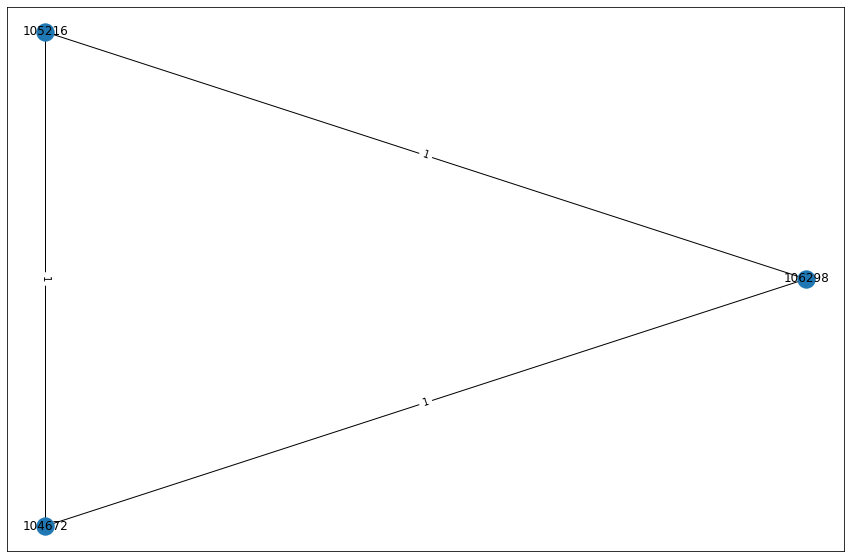

In [23]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, '104672')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

Asortativnost:
Homofilija - tendencija ljudi da stvaraju veze sa sebi slicnim ljudima
U analizi socijalnih mreze homofilija u formi asortativnosti - cvorovi imaju tendenciju da se povezuju sa cvorovima slicnog stepena

In [24]:
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

# asortativnost na osnovu drzave
r3 = nx.attribute_assortativity_coefficient(G, 'country')
print(f"Koeficijent asortativnosti na osnovu drzave: {r3}")

# asortativnost na osnovu ranga
r4 = nx.attribute_assortativity_coefficient(G, 'rank')
print(f"Koeficijent asortativnosti na osnovu ranga: {r4}")


Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.21868975600564688
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.22945507317379313
Koeficijent asortativnosti na osnovu drzave: 0.017737013898119852
Koeficijent asortativnosti na osnovu ranga: -0.005617682736737482


11)U kojoj meri teniseri imaju tendenciju da se susreću sa istim teniserima? Da li na to utiče njihovo rangiranje na ATP listi?

In [25]:
player_tendency_factors = {}
for player_id in G:
    if G.degree(player_id) != 0:
        player_tendency_factors[player_id] = G.degree(player_id, weight='weight') / G.degree(player_id)
    else:
        player_tendency_factors[player_id] = 0

avg_player_tendency_factor = sum(degreeview[1] for degreeview in G.degree(weight='weight')) / sum(degreeview[1] for degreeview in G.degree())


# effect on ranking
ranks = nx.get_node_attributes(G, 'rank')
data_final = []
for player_id in G:
    data_final.append((player_id, nx.get_node_attributes(G, 'name')[player_id], player_tendency_factors[player_id], ranks[player_id]))
df = pd.DataFrame(data_final, columns=['player_id', 'full_name', 'player_tendency_factors', 'rank'])
df.sort_values(by='player_tendency_factors', ascending=False, inplace=True)


In [26]:
print("Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: " + str(avg_player_tendency_factor))
df.head(n=10)


Prosecan odnos tezinskih u odnosu na netezinske grane u celom grafu: 1.1607071112896745


,player_id,full_name,player_tendency_factors,rank
213,106110,Filip Horansky,2.000000,215
202,104545,John Isner,1.555556,10
233,104925,Novak Djokovic,1.547619,1
301,103565,Stephane Robert,1.500000,195
221,100644,Alexander Zverev,1.480769,4
132,104731,Kevin Anderson,1.456522,6
253,104745,Rafael Nadal,1.400000,2
250,106432,Borna Coric,1.395349,12
110,105453,Kei Nishikori,1.391304,9
408,105227,Marin Cilic,1.382979,7


In [27]:
#12 Koji teniseri predstavljaju jezgro mreze?
core_number = nx.core_number(G)
print(core_number)#dict

max_core_number = max(core_number.values()) #max value u dict
print(max_core_number)

core = nx.k_core(G, max_core_number)
for player_id in core:
    print(player_id)
    print(nx.get_node_attributes(G, 'name')[player_id])

{'111442': 9, '105497': 2, '200619': 1, '207415': 1, '126205': 4, '105948': 2, '105870': 6, '111575': 20, '104607': 19, '105385': 14, '111460': 5, '200250': 1, '200031': 1, '109739': 20, '127570': 1, '105432': 6, '105812': 1, '105238': 8, '105932': 20, '207738': 1, '206000': 1, '106232': 2, '105166': 11, '105449': 20, '104180': 18, '105299': 1, '111200': 10, '200574': 1, '200175': 2, '103898': 18, '105578': 1, '106120': 5, '106174': 1, '207400': 1, '200045': 1, '106186': 5, '104797': 19, '105173': 20, '105688': 1, '104629': 6, '104534': 11, '105577': 16, '105656': 2, '134114': 1, '206768': 1, '106175': 2, '126502': 1, '105156': 1, '106167': 2, '106177': 2, '126120': 1, '104291': 20, '200218': 2, '200273': 2, '104467': 3, '104665': 9, '122330': 5, '111797': 20, '106348': 1, '200611': 1, '207479': 1, '105819': 9, '111794': 3, '105015': 5, '106426': 3, '202358': 1, '123795': 1, '109698': 1, '126207': 20, '106000': 20, '106298': 20, '105657': 20, '105643': 18, '106005': 3, '124014': 11, '1

In [28]:
#13 Ko su teniseri koji povezuju razlicite grupe u okviru mreze -> pronalazimo bridgeve u ovkviru mreze grane koje povezuju razlicite grupe u okviru mreze
bridges = nx.bridges(G)
list(bridges)

[('200619', '105688'),
 ('207415', '207400'),
 ('200250', '124126'),
 ('200031', '105683'),
 ('109739', '126120'),
 ('127570', '206768'),
 ('105812', '106150'),
 ('105812', '202165'),
 ('105932', '111795'),
 ('207738', '208028'),
 ('206000', '202358'),
 ('105449', '106353'),
 ('105299', '106233'),
 ('200574', '105373'),
 ('105578', '207971'),
 ('106120', '106393'),
 ('106174', '105933'),
 ('200045', '200460'),
 ('104797', '202090'),
 ('105173', '106348'),
 ('105688', '200620'),
 ('134114', '104251'),
 ('106175', '108739'),
 ('106175', '105499'),
 ('126502', '105273'),
 ('105156', '122669'),
 ('104291', '104947'),
 ('104291', '126845'),
 ('200273', '134120'),
 ('104467', '106106'),
 ('111797', '105111'),
 ('200611', '104792'),
 ('207479', '106021'),
 ('111794', '105641'),
 ('111794', '111761'),
 ('202358', '126203'),
 ('123795', '111761'),
 ('109698', '126174'),
 ('126207', '200624'),
 ('106000', '111192'),
 ('105657', '144776'),
 ('105657', '111167'),
 ('103970', '144645'),
 ('207836',

14. Kolika je gustina svake od modelovanih mreza? 
Gustina mreza moze se odrediti iz Gephi alata (Statistics -> Graph density) 
Racuna se za neusmerene grafove kao d = (2m)/n(n-1)
m -> broj grana
n -> broj cvorova

Rezultat:
<img src="img/graph_density.png" width=1000 height=1000 />

In [29]:
#koristeci python i networkx
density = nx.density(G)
print(f"Gustina mreze koristeci biblioteku network x je: {density}")


Gustina mreze koristeci biblioteku network x je: 0.028422651334345846


In [30]:
#15 U kojoj mrezi povezane i centralizovane mreze
#izracunacemo degree_centrality, closeness_centrality, information_centrality, betweenes_centrality i opisacemo znacenje tih vrednosti
DC = nx.degree_centrality(G)
import operator
dc_items = sorted(DC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(dc_items)
for dc_item in dc_items:
    node = dc_item[0]
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
#vazni cvorovi imaju veliki broj konekcija; broj direktnih suseda svakog cvora u mrezi
#akteri u mrezi sa vecim brojem relacija manje zavisni u odnosu na druge aktere

CC = nx.closeness_centrality(G)
cc_items = sorted(CC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(cc_items)
for cc_item in cc_items:
    node = cc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi su blizi drugim cvorovima, vazniji cvorovi centralniji polozaj u mrezi

BC = nx.betweenness_centrality(G)
bc_items = sorted(BC.items(), key=operator.itemgetter(1), reverse=True)[:5]
print(bc_items)
for bc_item in bc_items:
    node = bc_item[0];
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node])
#vazni cvorovi povezuju druge cvorove, mostovi posrednici izmedju ostalih cvorova u mrezi
#vazni cvorovi se nalaze na vecem broju najkracih putanja

#check if graph is connected
print(nx.is_connected(G))

#graf nije povezan ne moze se izracunati information_centrality
#nije povezan postoji grupa ljudi koji nisu igrali jedni sa drugima -> ne postoji protok informacija

[('104926', 0.14593301435406697), ('106233', 0.13157894736842105), ('126774', 0.12679425837320574), ('100644', 0.12440191387559808), ('104755', 0.12200956937799043)]
Fabio Fognini 13 ITA 61
Dominic Thiem 8 AUT 55
Stefanos Tsitsipas 15 GRE 53
Alexander Zverev 4 GER 52
Richard Gasquet 26 FRA 51
[('104926', 0.38868304352899985), ('106233', 0.3877373426931629), ('111575', 0.3863273887197332), ('104269', 0.3835380212921539), ('105173', 0.3817007134057244)]
Fabio Fognini 13 ITA
Dominic Thiem 8 AUT
Karen Khachanov 11 RUS
Fernando Verdasco 28 ESP
Adrian Mannarino 42 FRA
[('104655', 0.06984202008882846), ('104291', 0.043866509423082296), ('104926', 0.03372644443069474), ('105657', 0.03102832411331372), ('106210', 0.030991357611591427)]
Pablo Cuevas 88 URU
Malek Jaziri 45 TUN
Fabio Fognini 13 ITA
Marius Copil 60 ROU
Jiri Vesely 89 CZE
False


#habovi su vezani za degree_centrality i susedima onim sa najvecim vrednostima ove metrike iscrtati u gephiju videti TODO

16. Koje su prosecne distance, a koliki dijametar u okviru modelovanih mreza? 
Average Path length: 3.1371012285965936
Diameter: 11

In [31]:
#17. Kakva je distribucija cvorova po stepenu i da li prati neku zakonomernost? Kako je stepen cvora korelisan sa rejtingom tenisera? 
from collections import Counter
from operator import itemgetter

def plot_deg_frequency(G, weighted=False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({1: 123, 2: 52, 3: 36, 4: 23, 5: 15, 6: 12, 9: 10, 39: 8, 14: 6, 40: 6, 34: 6, 42: 6, 12: 6, 35: 6, 46: 5, 16: 5, 25: 5, 8: 5, 10: 5, 22: 5, 33: 5, 11: 4, 49: 4, 19: 4, 20: 4, 37: 4, 43: 4, 13: 4, 7: 3, 44: 3, 30: 3, 47: 3, 29: 3, 23: 2, 15: 2, 27: 2, 48: 2, 17: 2, 45: 2, 36: 2, 26: 2, 21: 1, 51: 1, 18: 1, 52: 1, 38: 1, 50: 1, 55: 1, 61: 1, 53: 1, 28: 1})


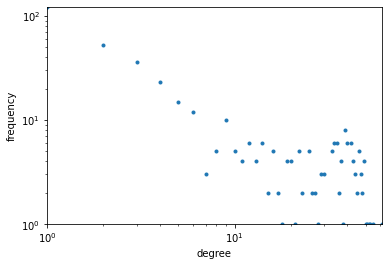

In [32]:
plot_deg_frequency(G)

#raspodela stepena čvora pokazuje da veliki broj čvorova ima stepen 1, odnosno da su igrali samo jedan meč. Sa druge strane, postoji mali broj čvorova sa većim stepenom. 

#ovakvi cvorovi prate power-law (scale-free) raspodelu

Counter({1: 123, 2: 50, 3: 37, 4: 22, 5: 16, 6: 13, 9: 8, 10: 7, 14: 7, 43: 6, 8: 5, 47: 5, 48: 5, 13: 5, 12: 4, 33: 4, 16: 4, 29: 4, 25: 4, 15: 3, 56: 3, 50: 3, 46: 3, 11: 3, 27: 3, 20: 3, 38: 3, 22: 3, 65: 3, 53: 3, 7: 2, 23: 2, 41: 2, 57: 2, 51: 2, 19: 2, 35: 2, 31: 2, 18: 2, 61: 2, 59: 2, 45: 2, 36: 2, 39: 2, 21: 2, 34: 2, 49: 2, 58: 2, 55: 2, 66: 1, 28: 1, 44: 1, 54: 1, 40: 1, 64: 1, 67: 1, 30: 1, 32: 1, 24: 1, 77: 1, 60: 1, 37: 1, 75: 1, 17: 1, 70: 1, 52: 1, 73: 1, 63: 1})


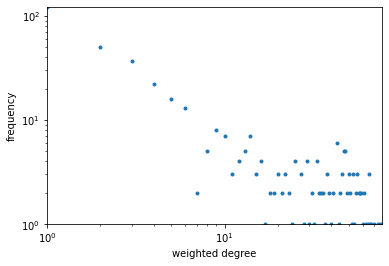

In [33]:
#graf je tezinski trebalo bi i ispitati i raspodelu po stepenu tezinskog grafa
plot_deg_frequency(G, weighted = True)

In [34]:
#kako je stepen cvora korelisan sa rejtingom tenisera
#izracunati stepen cvora i u svakom cvoru cuvamo rang sortirati tu listu po opadajucoj vrednosti ranga i ispisati zakljucke
for node in G.nodes:
    print(nx.get_node_attributes(G, 'name')[node], nx.get_node_attributes(G, 'rank')[node], nx.get_node_attributes(G, 'country')[node], G.degree[node])
    
    
#veci rang veci stepen cvora; Igraci sa vecim rangom imaju veci stepen cvora

Jordan Thompson 72 AUS 11
Jose Hernandez 267 DOM 3
Sebastian Arcila 9223372036854775807 PUR 1
Daniel Michalski 529 POL 1
Tommy Paul 202 USA 4
Federico Coria 279 ARG 2
Yannick Hanfmann 152 GER 7
Karen Khachanov 11 RUS 49
Tomas Berdych 71 CZE 23
Donald Young 248 USA 15
Quentin Halys 128 FRA 5
Mehluli Don Ayanda Sibanda 960 ZIM 1
Lucas Catarina 480 MON 1
Maximilian Marterer 74 GER 39
Rodrigo Arus 9223372036854775807 URU 1
Prajnesh Gunneswaran 110 IND 7
David Agung Susanto 1134 INA 2
Alexandr Dolgopolov 260 UKR 9
Nikoloz Basilashvili 21 GEO 46
Brandon Perez 9223372036854775807 VEN 1
Michel Saade 9223372036854775807 LIB 1
Roberto Cid 251 DOM 2
Peter Polansky 119 CAN 14
Steve Johnson 33 USA 44
Gilles Muller 138 LUX 27
Dzmitry Zhyrmont 697 BLR 1
Elias Ymer 115 SWE 14
Alexander Donski 1432 CAN 1
Miomir Kecmanovic 131 SRB 2
Julien Benneteau 140 FRA 19
Cristian Rodriguez 422 COL 1
Ricardo Ojeda Lara 272 ESP 6
Gonzalo Lama 632 CHI 1
Mark Chigaazira 1491 ZIM 1
Anthony Susanto 1743 INA 1
Jason Kubl

18. Da li u mrezi postoje habovi i koji su?
Hubovi predstavljaju najvaznije cvorove. Referenca pitanje 15 i razlicitim izracunatim centralnostima, samo treba ocitati koji su to teniseri

In [35]:
#19. Da li mreza iskazuje osobine malog sveta?

#Mreza nije povezana, pa se ne moze izracunati prosecna udaljenost cvorova, vec je moguce naci najvecu povezanu komponentu pa analizirati nju na osnovu prosecne udaljenosti cvorova koja je izracunata i prema koeficijentu klasterizacije izracunatim za tu najvecu komponentu

print(nx.number_connected_components(G))
largest_connected_component = max(nx.connected_components(G), key=len) #vraca set cvorova
print(len(largest_connected_component))

print("Velicine svih povezanih komponenti: ")
for comp in nx.connected_components(G):
          print(len(comp))

#formiramo graf
graph_connected_component = G.copy()
graph_connected_component.remove_nodes_from(G.nodes()-largest_connected_component)
        
var_path = nx.average_shortest_path_length(graph_connected_component)
print(var_path)
print("Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:")
print((var_path/(len(largest_connected_component)))*100)

print("Prosecan koeficijent klasterizacije")
print(nx.average_clustering(graph_connected_component))

#Posto je koeficijent klasterizacije mali ovo ne ispoljava osobina malog sveta




18
366
Velicine svih povezanih komponenti: 
366
2
2
2
19
2
2
2
2
2
4
2
2
2
2
2
2
2
3.137704918032787
Odnos izmedju broja cvorova najvece povezane komponente i ukupnog broja cvorova:
0.8572964256920184
Prosecan koeficijent klasterizacije
0.13998203859759709


In [36]:
#20. Ego mreze i osobine
#Novak Djokovic 104925
Novak_ego = nx.ego_graph(G, '104925', undirected=True)
Novak_ego.name = "novak"
print(nx.info(Novak_ego))

#Roger Federer 103819
Roger_ego = nx.ego_graph(G, '103819', undirected=True)
Roger_ego.name = "roger"
print(nx.info(Roger_ego))

#Rafael Nadal 104745
Nadal_ego = nx.ego_graph(G, '104745', undirected=True)
Nadal_ego.name = "nadal"
print(nx.info(Nadal_ego))

#sacuvaj u odredjenom formatu
nx.write_gexf(Novak_ego, "models/djokovic_2018.gexf")
nx.write_gexf(Roger_ego, "models/federer_2018.gexf")
nx.write_gexf(Nadal_ego, "models/nadal_2018.gexf")

#unija Djokovic Federer Nadal
ego_union = nx.disjoint_union(Novak_ego, Roger_ego)
ego_union = nx.disjoint_union(Nadal_ego, Nadal_ego)

ego_graphs = [Novak_ego, Roger_ego, Nadal_ego]

ego_player_nadal_djokovic_federer = set()

for H in ego_graphs:
    for player_id in H: 
        ego_player_nadal_djokovic_federer.add(player_id)
    
print(len(ego_player_nadal_djokovic_federer))
#set objekat je unique, ne dozvoljava duplikate
print(len(skup_id))
#21 analizirati poziciju ego cvora unutar svake od ego mreza TODO(plt.show())
#22 analizirati ugradjenost svake od ego mreza unutar celokupne mreze (TODO)
#23 Unifikacija ego mreza (koliki procenat ucestvuje u njoj). Sprovesti klasterisanje na 3 klastera i na osnovu dobijenih rezultata
#dati interpretaciju kriterijuma pripadnosti klasterima



Name: novak
Type: Graph
Number of nodes: 43
Number of edges: 324
Average degree:  15.0698
Name: roger
Type: Graph
Number of nodes: 45
Number of edges: 355
Average degree:  15.7778
Name: nadal
Type: Graph
Number of nodes: 36
Number of edges: 229
Average degree:  12.7222
81
419


Analiza ugradjenosti svake od ego mreza unutar celokupne mreze (uradjena je u Gephi alatu primenom odgovarajuceg filtera i odgovarajuceg layout-a prikaza za svaki od navedenih cvorova -> unese se id cvora za koji hocemo da prikazemo ego mrezu i primenom odgovarajuceg filtra i nacina prikaza prikaze se jasno definisana struktura ego mreze i njena ugradjenost u celokupnu mrezu) 

Novak Djokovic

<img src="img/graph_ego_djokovic.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/graph_ego_nadal.png" width=1000 height=1000 />

Roger Federer

<img src="img/graph_ego_roger.png" width=1000 height=1000 />



Analiza pozicije svakog ego cvora u okviru sopstvene ego mreze

Novak Djokovic

<img src="img/novak_djokovic_node.png" width=1000 height=1000 />

Rafael Nadal

<img src="img/rafael_nadal_node.png" width=1000 height=1000 />

Roger Federer

<img src="img/roger_federer_node1.png" width=1000 height=1000 />



In [37]:
#23 Analizirati mrezu dobijenu unifikacijom ego mreza clanova Velike trojke. Koji procenat cvorova mreze svih tenisera ucestvuje u njoj. Sprovesti klasterisanje ovako dobijene mreze na 3 klastera i na osnovu dobijenih rezultata dati interpretaciju kriterijuma pripadnosti klasterima

# ego_player_nadal_djokovic_federer igraci iz ego mreza dobijeni njihovom unijom i smesteni u set
# skup_id svi igraci
from networkx.algorithms import community

percentage_ego = (len(ego_player_nadal_djokovic_federer)/len(skup_id))*100
print("Procentualno: ");
print(percentage_ego);

G_copied = G.copy();
G_copied.remove_nodes_from(G.nodes - ego_player_nadal_djokovic_federer)
print(len(G_copied.nodes)) #verifikovano

async_fluids_results = community.asyn_fluidc(G_copied,3, seed = 0) #ovaj algoritam na pocetku izabere nasumicno izabere 3 celine, a onda iterativno dodaje uzimavsi u obzir sam graf i njegove susede. Proces se ponavlja do dostizanja konverfencije
community1 = next(async_fluids_results)
community2 = next(async_fluids_results)
community3 = next(async_fluids_results)
#u zbiru tacno 81
print(len(community1))
print(len(community2))
print(len(community3))
#ispis pripadnosti odgovarajucim cvorovima
print(community1)
print(community2)
print(community3)

#todo formiraj graf u gephiju i analiziraj grupe cvorova koji pripadaju celini

Procentualno: 
19.331742243436754
81
28
25
28
{'105138', '105051', '104259', '105577', '105332', '105062', '111575', '105385', '103970', '105223', '100644', '104919', '105936', '105166', '103819', '105676', '104731', '105227', '105777', '106432', '106423', '104898', '111202', '105526', '104999', '200282', '105657', '104468'}
{'104755', '106045', '104607', '104527', '105373', '109739', '106148', '106121', '105238', '103607', '106421', '105453', '105815', '104871', '104745', '126774', '104312', '104620', '106401', '133430', '106415', '104926', '104297', '106000', '104198'}
{'105173', '104269', '104534', '106210', '105077', '105550', '104925', '106233', '106043', '106378', '105683', '105583', '105932', '105357', '105074', '105449', '105041', '104545', '105916', '105806', '105311', '106065', '105376', '105379', '104547', '104792', '105643', '144719'}


In [38]:
import matplotlib.pyplot as plt

def draw_rank_correlation(x_rank, y_rank, x_label, y_label, how="scatter"):                                                    
    plt.figure(num=1, figsize=[10, 5])

    labels = x_rank
    plt.xlabel(x_label)
    
    plt.ylabel(y_label)                                                                                                          
    plt.yscale('linear')                                                                                                                
    plt.ylim(1, max(y_rank) * 1.1)                                                                                                             
    
    if how == "plot":
        plt.plot(x_rank, y_rank, marker='.')
    else:
        plt.scatter(x_rank, y_rank, marker='.')
    plt.show()

24)Kakva je distribucija broja tenisera u odnosu na broj meceva koji su odigrali?

In [39]:
dataframe_1 = data[['winner_id', 'id', 'tourney_date']]
dataframe_1 = dataframe_1.rename(columns = {'winner_id': 'player_id'})
print(dataframe_1)
dataframe_2 = data[['loser_id', 'id', 'tourney_date']]
dataframe_2 = dataframe_2.rename(columns = {'loser_id': 'player_id'})
print(dataframe_2)
plot_df = pd.concat([dataframe_1, dataframe_2])
plot_df = plot_df.dropna()
plot_df = plot_df.groupby('player_id').size()
print(plot_df)

      player_id    id  tourney_date
0        105992     0      20180101
1        111577     1      20180101
2        104797     2      20180101
3        200282     3      20180101
4        111581     4      20180101
...         ...   ...           ...
2884     104925  2884      20181112
2885     100644  2885      20181112
2886     106432  2886      20181123
2887     105227  2887      20181123
2888     105227  2888      20181123

[2889 rows x 3 columns]
      player_id    id  tourney_date
0        104919     0      20180101
1        111442     1      20180101
2        106000     2      20180101
3        105449     3      20180101
4        105643     4      20180101
...         ...   ...           ...
2884     104731  2884      20181112
2885     104925  2885      20181112
2886     104871  2886      20181123
2887     104542  2887      20181123
2888     106298  2888      20181123

[2889 rows x 3 columns]
player_id
100644    77
103333    27
103499     3
103529     2
103565     3
          .

     player_id  numMatches
0       100644          77
224     106233          75
330     126774          73
66      104926          70
51      104731          67
..         ...         ...
280     111578           1
283     111790           1
285     111795           1
88      105147           1
418     208029           1

[419 rows x 2 columns]
    numMatches  numPlayers
0            1         123
1            2          50
2            3          37
3            4          22
4            5          16
..         ...         ...
63          67           1
64          70           1
65          73           1
66          75           1
67          77           1

[68 rows x 2 columns]


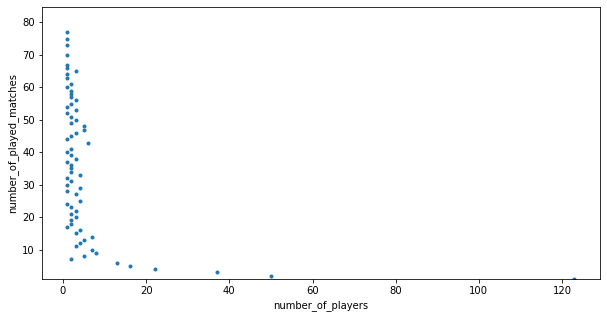

In [40]:
df_tourneys_counts = plot_df.reset_index(name='numMatches')
df_tourneys_counts = df_tourneys_counts.sort_values('numMatches', ascending=False)
df_tourneys_counts = df_tourneys_counts.drop_duplicates()
print(df_tourneys_counts)
df_tourneys_counts_grouped = df_tourneys_counts.groupby('numMatches').size().reset_index(name='numPlayers')
print(df_tourneys_counts_grouped)
draw_rank_correlation(df_tourneys_counts_grouped['numPlayers'], df_tourneys_counts_grouped['numMatches'], 'number_of_players', 'number_of_played_matches', how='scatter')

25)Kakva je distribucija broja turnira u odnosu na podlogu i godinu održavanja?

In [41]:
plot_df = data[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)


  surface  tourneys
0    Clay        47
1   Grass        10
2    Hard        78


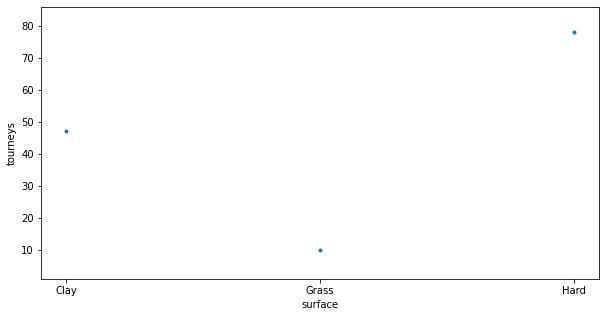

In [42]:
df_tourneys_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_surfaces)
draw_rank_correlation(df_tourneys_surfaces['surface'], df_tourneys_surfaces['tourneys'], 'surface', 'tourneys', how='scatter')

  tourney_date  tourneys
0         2018       135


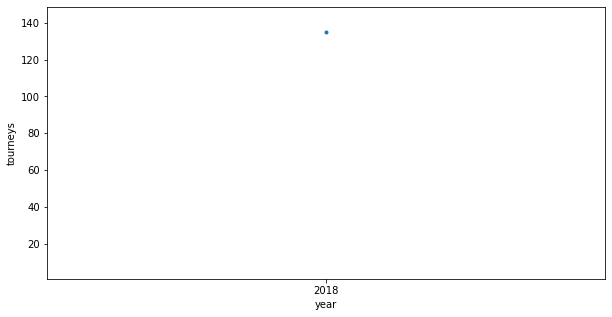

In [43]:
#data has only year 2018 so all of them were then
df_tourneys_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
print(df_tourneys_years)
draw_rank_correlation(df_tourneys_years['tourney_date'], df_tourneys_years['tourneys'], 'year', 'tourneys', how='plot')

  surface tourney_date  tourneys        year
0    Clay         2018        47   Clay 2018
1   Grass         2018        10  Grass 2018
2    Hard         2018        78   Hard 2018



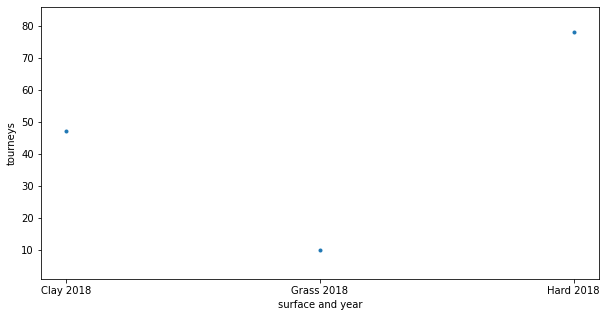

In [44]:
df_tourneys_surface = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'nunique'}).reset_index().rename(columns={'tourney_id': 'tourneys'})
df_tourneys_surface['year'] = df_tourneys_surface[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_tourneys_surface)
print()
draw_rank_correlation(df_tourneys_surface['year'], df_tourneys_surface['tourneys'], 'surface and year', 'tourneys')

26)Kakva je distribucija broja mečeva u odnosu na podlogu i godinu održavanja?

In [45]:
plot_df = data[['tourney_id', 'tourney_name', 'surface', 'tourney_date']]
plot_df = plot_df.dropna()
#extracts the year
plot_df['tourney_date'] = plot_df.apply(lambda row: str(row['tourney_date'])[0:4], axis=1)


  surface  matches
0    Clay      897
1   Grass      331
2    Hard     1661


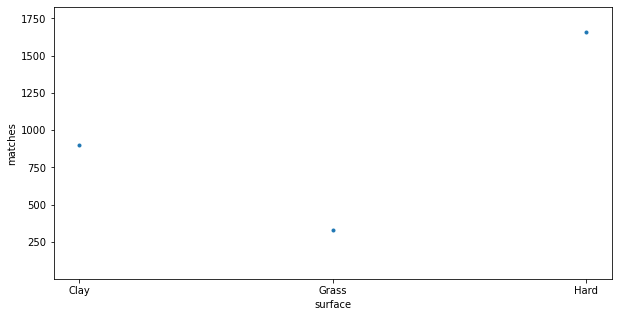

In [46]:
df_matches_surfaces = plot_df.groupby(['surface']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_surfaces)
draw_rank_correlation(df_matches_surfaces['surface'], df_matches_surfaces['matches'], 'surface', 'matches', how='scatter')

  tourney_date  matches
0         2018     2889


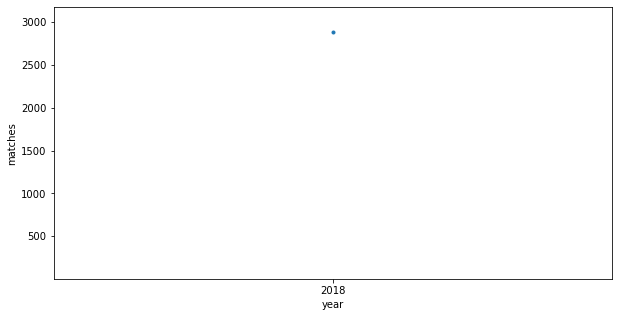

In [47]:
#data has only year 2018 so all of them were then
df_matches_years = plot_df.groupby(['tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
print(df_matches_years)
draw_rank_correlation(df_matches_years['tourney_date'], df_matches_years['matches'], 'year', 'matches', how='plot')

  surface tourney_date  matches        year
0    Clay         2018      897   Clay 2018
1   Grass         2018      331  Grass 2018
2    Hard         2018     1661   Hard 2018



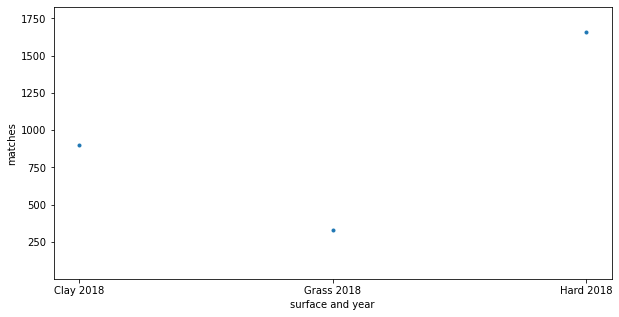

In [48]:
df_matches_surfaces = plot_df.groupby(['surface', 'tourney_date']).agg({'tourney_id': 'count'}).reset_index().rename(columns={'tourney_id': 'matches'})
df_matches_surfaces['year'] = df_matches_surfaces[['surface', 'tourney_date']].agg(' '.join, axis=1)
print(df_matches_surfaces)
print()
draw_rank_correlation(df_matches_surfaces['year'], df_matches_surfaces['matches'], 'surface and year', 'matches')